In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  # Example classifier

# Load your dataset
data = pd.read_csv("./ECG_Processed.csv")
data.head()

,Pat_ID,ID,age,sex,Acute infarction (localization),Smoker,i_Mean_ECG_Rate,i_Mean_ECG_Quality,i_Coeff_R_peaks,i_Mean_ECG_Phase_Atrial,...,0_Mean_ECG_Phase_Completion_Ventricular,0_Coeff_RR_intervals,0_Coeff_PR_intervals,0_Coeff_QT_intervals,0_std_pp_intervals,0_std_QRS_Interval,0_HRV_SDNN,0_HRV_RMSSD,0_HRV_pNN20,target
0,patient001,s0010_re,81.0,female,infero-latera,no,81.773949,0.603859,27.156243,0.197663,...,0.489792,0.012929,0.233522,0.134078,0.052042,0.000052,9.580167,11.401754,3.921569,Myocardial infarction
1,patient001,s0014lre,81.0,female,infero-latera,no,86.246142,0.925716,26.404201,0.207896,...,0.495395,0.011190,0.276411,1.643388,0.053522,0.000042,7.811761,7.815354,3.658537,Myocardial infarction
2,patient001,s0016lre,81.0,female,infero-latera,no,79.856263,0.875193,27.421546,0.198774,...,0.495920,0.021960,0.231771,1.229889,0.051539,0.000039,16.561997,22.153438,14.473684,Myocardial infarction
3,patient002,s0015lre,58.0,female,anterior,yes,78.863330,0.789990,27.602788,0.139431,...,0.496615,0.027987,0.190472,1.765927,0.051201,0.000047,21.366385,9.045374,4.000000,Myocardial infarction
4,patient003,s0017lre,63.0,male,infero-postero-lateral,yes,72.289757,0.711433,28.875294,0.210481,...,0.494705,0.028571,0.191781,1.428576,0.048413,0.000045,23.794461,11.989885,10.218978,Myocardial infarction


In [30]:
data['target'].value_counts()

target
Myocardial infarction     367
Healthy control            80
Dysrhythmia                16
Cardiomyopathy             15
Bundle branch block        15
Hypertrophy                 7
Valvular heart disease      6
Myocarditis                 4
Stable angina               2
Heart failure (NYHA 2)      1
Heart failure (NYHA 3)      1
Palpitation                 1
Heart failure (NYHA 4)      1
Unstable angina             1
Name: count, dtype: int64

In [31]:
data = data.drop(columns={'Pat_ID','ID'})

In [32]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['sex','Acute infarction (localization)', 'Smoker','target']

# Apply label encoding to each specified column
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,age,sex,Acute infarction (localization),Smoker,i_Mean_ECG_Rate,i_Mean_ECG_Quality,i_Coeff_R_peaks,i_Mean_ECG_Phase_Atrial,i_Mean_ECG_Phase_Completion_Atrial,i_Mean_ECG_Phase_Ventricular,...,0_Mean_ECG_Phase_Completion_Ventricular,0_Coeff_RR_intervals,0_Coeff_PR_intervals,0_Coeff_QT_intervals,0_std_pp_intervals,0_std_QRS_Interval,0_HRV_SDNN,0_HRV_RMSSD,0_HRV_pNN20,target
0,81.0,0,5,1,81.773949,0.603859,27.156243,0.197663,0.489167,0.498944,...,0.489792,0.012929,0.233522,0.134078,0.052042,0.000052,9.580167,11.401754,3.921569,8
1,81.0,0,5,1,86.246142,0.925716,26.404201,0.207896,0.495786,0.493150,...,0.495395,0.011190,0.276411,1.643388,0.053522,0.000042,7.811761,7.815354,3.658537,8
2,81.0,0,5,1,79.856263,0.875193,27.421546,0.198774,0.496376,0.471129,...,0.495920,0.021960,0.231771,1.229889,0.051539,0.000039,16.561997,22.153438,14.473684,8
3,58.0,0,0,3,78.863330,0.789990,27.602788,0.139431,0.495812,0.312683,...,0.496615,0.027987,0.190472,1.765927,0.051201,0.000047,21.366385,9.045374,4.000000,8
4,63.0,1,9,3,72.289757,0.711433,28.875294,0.210481,0.494297,0.382452,...,0.494705,0.028571,0.191781,1.428576,0.048413,0.000045,23.794461,11.989885,10.218978,8


**Applying LDA**

In [33]:
# Handle missing values using SimpleImputer (filling NaNs with the column mean)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Normalize features to improve performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Print LDA Components and related details
print("LDA Components (Eigenvectors):\n", lda.scalings_)
print("Explained Variance Ratio:\n", lda.explained_variance_ratio_)
print("Class-wise Means:\n", lda.means_)
print("Number of LDA Components:", lda.n_components)


LDA Components (Eigenvectors):
 [[ 2.93287782e-01  3.73986379e-01 -1.00290052e-01 -4.15827463e-01
  -1.41771573e-01 -3.71921344e-01  4.34390785e-02  1.98820806e-01
  -2.73820456e-01 -1.57999762e-01  1.79350944e-01  2.32879379e-02
   1.25235042e-01]
 [-6.23261873e-02  2.31537658e-01 -3.10157085e-01 -1.30383122e-01
  -3.76902359e-01 -3.61462904e-02  1.52902327e-01  6.67751254e-02
  -2.57730376e-01 -7.74484982e-02  2.17690062e-02 -4.30245631e-02
  -2.31569411e-01]
 [-1.68853196e+00 -2.00343610e-01 -2.16925600e-01 -1.17407067e-01
   1.49637938e-02  3.05217644e-02 -1.90979357e-01  2.44719608e-01
  -2.04579839e-02 -1.40268608e-01 -6.85761560e-02 -6.05215895e-02
   2.57814969e-01]
 [ 3.85948051e-01 -2.33335783e-01  2.96448914e-01  8.02310697e-02
   3.13425980e-01 -4.82722344e-02 -2.93999537e-01 -6.86412352e-02
  -1.49498109e-01  1.08901995e-01 -6.25081007e-02 -1.07445732e-01
   1.47683554e-04]
 [-5.63022580e-01 -1.02628126e-02 -1.39796571e+00  1.74872079e+00
   1.17531232e+00 -1.74406013e+00 

In [40]:
# Extract feature importance for LDA components
lda_components = lda.scalings_  # Shape: (num_features, num_components)
feature_importance_lda = pd.DataFrame(lda_components,columns=[f'LD{i+1}' for i in range(lda_components.shape[1])],index=X.columns)  # Ensure X.columns is correctly defined

print("Feature importance for LDA components:")
print(feature_importance_lda)


Feature importance for LDA components:
                                      LD1       LD2       LD3       LD4  \
age                              0.293288  0.373986 -0.100290 -0.415827   
sex                             -0.062326  0.231538 -0.310157 -0.130383   
Acute infarction (localization) -1.688532 -0.200344 -0.216926 -0.117407   
Smoker                           0.385948 -0.233336  0.296449  0.080231   
i_Mean_ECG_Rate                 -0.563023 -0.010263 -1.397966  1.748721   
...                                   ...       ...       ...       ...   
0_std_pp_intervals               0.284709  0.431688  0.657650 -0.005546   
0_std_QRS_Interval               0.281937 -0.036873 -0.410686  0.253914   
0_HRV_SDNN                      -0.391584  0.927601 -1.922228 -0.532692   
0_HRV_RMSSD                      0.565971 -0.223739  0.453809  0.418183   
0_HRV_pNN20                     -0.101652  0.581394  0.328004  0.220070   

                                      LD5       LD6       LD

Scatter plot for projection of first 2 Components of LDA

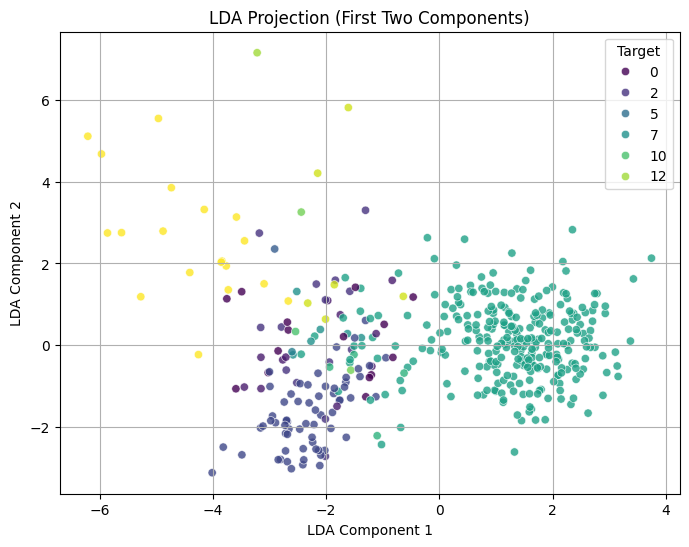

In [41]:
# Convert LDA components to a DataFrame for plotting
lda_df = pd.DataFrame(X_train_lda, columns=[f'LD{i+1}' for i in range(X_train_lda.shape[1])])
lda_df['Target'] = y_train.values  # Add labels for color coding

# 2D Scatter plot of first two LDA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LD1', y='LD2', hue='Target', data=lda_df, palette='viridis', alpha=0.8)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection (First Two Components)')
plt.legend(title='Target')
plt.grid()
plt.show()